In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
iris=pd.read_csv(r"Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


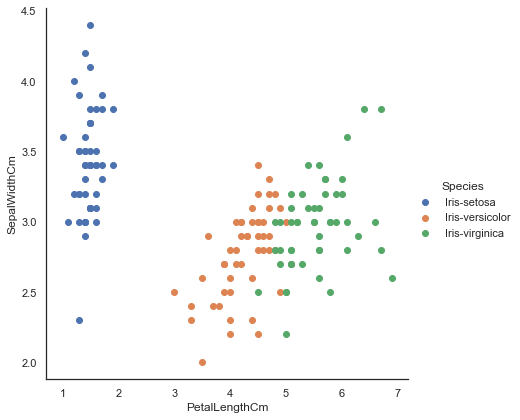

In [9]:
sns.FacetGrid(iris,hue="Species",height=6).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()

In [10]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.replace({'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

In [12]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
x=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=iris['Species'].values

In [14]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
model=LogisticRegression()#By using logistic regression

In [16]:
model.fit(x,y)

LogisticRegression()

In [17]:
model.score(x,y)

0.9733333333333334

In [18]:
expected=y
predicated=model.predict(x)
predicated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
print(metrics.classification_report(expected,predicated))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [20]:
print(metrics.confusion_matrix(expected,predicated))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [21]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4,shuffle=True)
x_train #By using Knn model

array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5.6, 2.9, 3.6, 1.3],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5. , 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [5.4, 3.4, 1.5, 0.4],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.6, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 3

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn= KNeighborsClassifier(n_neighbors=3)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred=knn.predict(x_test)
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2], dtype=int64)

In [26]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.9777777777777777